<a href="https://colab.research.google.com/github/Shifoue/Segmentation/blob/main/Mask_Segmentation_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import numpy as np
import mediapipe as mp
import cv2 as cv
from google.colab.patches import cv2_imshow

In [21]:
original_image = cv.imread("/content/Face2.jpg")
img = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)

In [22]:
mp_face_mesh = mp.solutions.face_mesh

LEFT_IRIS = [474,475, 476, 477]
RIGHT_IRIS = [469, 470, 471, 472]

In [27]:
with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
) as face_mesh:
    rgb_frame = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_h, img_w = img.shape[:2]
    results = face_mesh.process(rgb_frame)
    mask = np.zeros((img_h, img_w), dtype=np.uint8)

    if results.multi_face_landmarks:
            
        mesh_points=np.array([np.multiply([p.x, p.y], [img_w, img_h]).astype(int) 
        for p in results.multi_face_landmarks[0].landmark])
            
        (l_cx, l_cy), l_radius = cv.minEnclosingCircle(mesh_points[LEFT_IRIS])
        (r_cx, r_cy), r_radius = cv.minEnclosingCircle(mesh_points[RIGHT_IRIS])
        center_left = np.array([l_cx, l_cy], dtype=np.int32)
        center_right = np.array([r_cx, r_cy], dtype=np.int32)
        cv.circle(original_image, center_left, int(l_radius), (0,255,0), 2, cv.LINE_AA)
        cv.circle(original_image, center_right, int(r_radius), (0,255,0), 2, cv.LINE_AA)

        cv.circle(mask, center_left, int(l_radius), (255,255,255), -1, cv.LINE_AA)
        cv.circle(mask, center_right, int(r_radius), (255,255,255), -1, cv.LINE_AA)

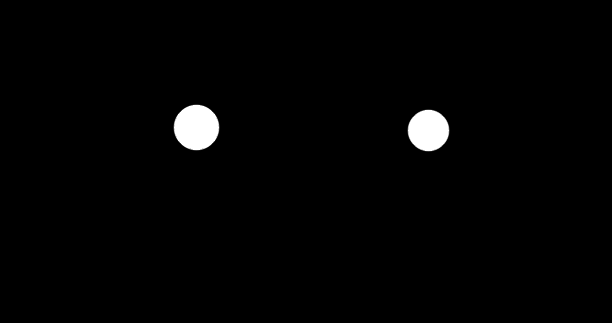

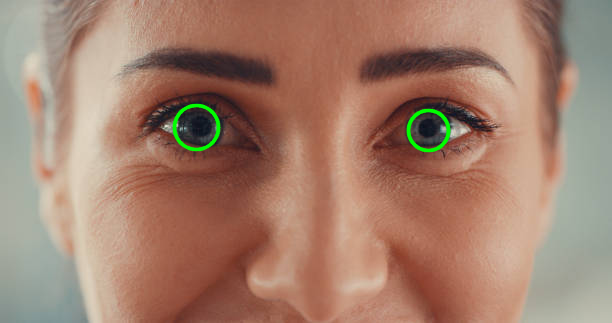

In [28]:
cv2_imshow(mask)     
cv2_imshow(original_image)